

# Project: Investigate a Dataset - [TMDB_Project_AM]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

**This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The dataset has been wrangled, cleaned, and an EDA (exploratory data analysis) completed to gain some insights into the data.** 

Data Key:

imdb_id: id for each movies from the database

popularity: How many times the movie's title’s page was visited for that year

budget: The movie's budget

revenue: The revenue of the movie

original title: Title of the movie

cast: Actors in the movie

director: The director of the movie

overview: The plot of the movie

runtime: The length of the movie

genre: What type of movie

production_companies: The number of companies that produced the film

release_date: The date of the movie's release

vote_count: The total number of user votes for a particular movie

vote_average: The average of the user's votes for a particular movie

release_year: Year the movie was released

budget_adjusted: The budget adjusted for inflation

revenue_adjusted: The budget adjusted for inflation


### Question(s) for Analysis

Which genres are most popular, year over year (analyzed by revenue_adj and profit)?

What kinds of properties are associated with movies that have high revenues?

What movies were the biggest flops and what properties are similar with flops?

What directors have the movies with the most profit and most revenue?

In [59]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<a id='wrangling'></a>
## Data Wrangling

   TMDb dataset observations from the data wrangling process.
For the budget, revenue, budget adjusted, and revenue adjusted columns, 
the rows that have 0 should be deleted because this would skew the data dramatically and produce unreliable results. 
Actual numbers need to be provided because no movie was made with 0 dollars for a budget or in revenue. 
Since this is a number's format column, selecting 'not provided' would not work. 
Also, putting the average for the budget and revenues would not be helpful since we don't acutally know whether the movie was a small, medium, or large budge film.

The dataset needs to be cleaned up all of the extra decimal numbers so that the data will look cleaner. 

The exponential numbers need to be changed from exponential numbers to the actual numbers for the 'budget_adj' & 'revenue_adj' columns.

The column 'genre' needs to have only one answer instead of better answers for better analysis.

Columns 'homepage', 'tagline', 'keywords' will be deleted since they are considered superflurious data for this analysis 
and contain the most blank columns.


### General Properties
   The following methods were utilized for the data wrangling. These methods were .head(), .query(), .describe(), .info(), and .count(). A Histogram was also added to chart down the most important columns.

In [60]:
# Load your data and print out a few lines. What is the size of your dataframe? 
#   Perform operations to inspect data types and look for instances of missing
#   or possibly errant data. There are at least 4 - 6 methods you can call on your
#   dataframe to obtain this information.
df_movie = pd.read_csv('./Database_TMDb_movie_data/tmdb-movies.csv')
# search for the top 5 results
df_movie.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


In [61]:
# Searching for a Random movie
avatar = df_movie.query('original_title == "Avatar"')
print(avatar)

         id    imdb_id  popularity     budget     revenue original_title  \
1386  19995  tt0499549        9.43  237000000  2781505847         Avatar   

                                                   cast  \
1386  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   

                         homepage       director                      tagline  \
1386  http://www.avatarmovie.com/  James Cameron  Enter the World of Pandora.   

      ...                                           overview runtime  \
1386  ...  In the 22nd century, a paraplegic Marine is di...     162   

                                        genres  \
1386  Action|Adventure|Fantasy|Science Fiction   

                                   production_companies release_date  \
1386  Ingenious Film Partners|Twentieth Century Fox ...     12/10/09   

     vote_count  vote_average  release_year     budget_adj      revenue_adj  
1386       8458          7.10          2009 240,886,902.89 2,827,123,750.41  

[1 rows x 21 colu

In [62]:
# Searching for another random movie
ww = df_movie.query('original_title == "The Warrior\'s Way"')
print(ww)

         id    imdb_id  popularity     budget   revenue     original_title  \
2244  46528  tt1032751        0.25  425000000  11087569  The Warrior's Way   

                                                   cast  \
2244  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...   

                                    homepage    director  \
2244  http://www.iamrogue.com/thewarriorsway  Sngmoo Lee   

                      tagline  ...  \
2244  Assassin. Hero. Legend.  ...   

                                               overview runtime  \
2244  An Asian assassin (Dong-gun Jang) is forced to...     100   

                                         genres      production_companies  \
2244  Adventure|Fantasy|Action|Western|Thriller  Boram Entertainment Inc.   

     release_date vote_count  vote_average  release_year     budget_adj  \
2244      12/2/10         74          6.40          2010 425,000,000.00   

       revenue_adj  
2244 11,087,569.00  

[1 rows x 21 columns]


In [63]:
# figure out the rows and columns
df_movie.shape

(10866, 21)

In [64]:
# Lets see what the descriptive statistics tell us about the datafile.
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


In [65]:
# Let's get an idea of all of the columns and Dtypes.
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [66]:
# Let's see if there are missing or n/a values.
# This is the same information as in the .info method as well, but clearer to see.
df_movie.count()

id                      10866
imdb_id                 10856
popularity              10866
budget                  10866
revenue                 10866
original_title          10866
cast                    10790
homepage                 2936
director                10822
tagline                  8042
keywords                 9373
overview                10862
runtime                 10866
genres                  10843
production_companies     9836
release_date            10866
vote_count              10866
vote_average            10866
release_year            10866
budget_adj              10866
revenue_adj             10866
dtype: int64

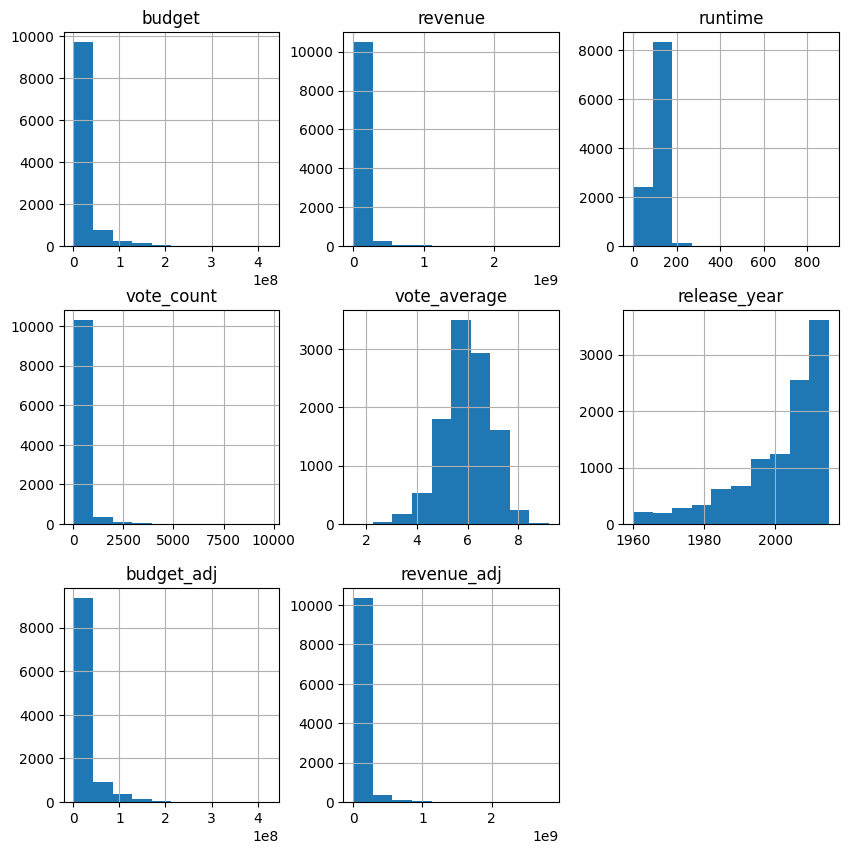

In [67]:
df_movie[['budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']].hist(figsize=(10,10));


### Data Cleaning

Data Cleaning
The data cleaning process includes:

Dropping columns that are not needed like homepage, tagline, and keywords.

Formatting the float numbers such as revenue_adj, budget_adj so they are in actual numbers and not in exponential numbers.

Separating out all of the multiple genres and using the first genre that was provided.

Checking for NAN values. After figuring out the NAN values are mostly in columns with strings they will be left untouched.

Checking for 0's in any of the columns, and subsequently removing those rows from the dataset so as not to skew any of the analysis.

### Data Clean - Dropping columns 
Since some of the columns don't appear to provide any informative and statistical insight, I have decided to remove the following columns ('homepage', 'tagline', 'keywords'). The Pandas drop() method was used to delete these columns as a part of the data clean process. 

In [68]:
# Dropping columns that are not needed for this analysis.
df_movie.drop(['homepage','tagline','keywords'], axis=1, inplace=True)

### Data Clean - Format the float numbers
For better readability, the float numbers has been formatted to only two decimals places. What this also does is changes the 'budget_adj' & 'revenue_adj' from exponential numbers to regular formatted float numbers like 137,999,939.28 and 1,392,445,892.52 as seen below in the 0 index of

print(df_movie[['popularity','vote_average', 'budget_adj', 'revenue_adj']].head()). 

It is better to read numbers that have regular number notations when possible and not exponential numbers which could get confusing, hence why these columns were cleaned to show just float numbers.

In [69]:
# Formatting float numbers to have commas for better readability.
pd.options.display.float_format = '{:,.2f}'.format

In [70]:
# Display the DataFrame with formatted numbers
print(df_movie[['popularity','vote_average', 'budget_adj', 'revenue_adj']].head())

   popularity  vote_average     budget_adj      revenue_adj
0       32.99          6.50 137,999,939.28 1,392,445,892.52
1       28.42          7.10 137,999,939.28   348,161,292.49
2       13.11          6.30 101,199,955.47   271,619,025.41
3       11.17          7.50 183,999,919.04 1,902,723,129.80
4        9.34          7.30 174,799,923.09 1,385,748,801.47


#### Let's see what the top five results are showing now after some data clean processes. .drop() and .format() was utilized.

In [71]:
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47"


### Data Clean - Looking at the .info method, now there are 18 columns instead of 21 columns with the columns having been deleted.

In [72]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   director              10822 non-null  object 
 8   overview              10862 non-null  object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  release_date          10866 non-null  object 
 13  vote_count            10866 non-null  int64  
 14  vote_average          10866 non-null  float64
 15  release_year       

### Data Clean - Now let's focus on the Genres column and see what types of genres there are and if there are multiple genres in one column. Using the value_counts method on the genres columns, we can see that there are multiple genres in some of the rows that are separated by piping. For a statistical analysis to work on the 'genres' column, we need just one genre in each row. So deleting the additional genres in some of the rows will be needed.

In [73]:
# Figuring out all of the Genres in the dataset.
df_movie[['genres']].value_counts()

genres                            
Comedy                                712
Drama                                 712
Documentary                           312
Drama|Romance                         289
Comedy|Drama                          280
                                     ... 
Comedy|Romance|Music                    1
Comedy|Romance|Horror                   1
Comedy|Romance|Fantasy|Drama            1
Comedy|Romance|Crime|Drama|Mystery      1
Western|Thriller                        1
Length: 2039, dtype: int64

### Data clean - getting only one result in the genre column
The split method and a lambda function are both used to get only one genre in each row so that we can better complete an analysis on the 'genre' column. Now we have one genre for in each row instead of multiple genres in certain rows.

In [74]:
# lambda function to sepate the piping to get only one result in the genre column
lamda_genres = (df_movie['genres'].str.split('|', expand=True).rename(columns=lambda x: f"numgenres_{x+1}"))
lamda_genres
#replacing genres column with numgenres_1
df_movie['genres']=lamda_genres['numgenres_1']

### Data Clean - Checking the data to see if the genres were correctly split by using the tail method to inspected the final 10 rows in the dataset.

In [75]:
# Checking the genres column at the bottom of the list to see that there is only genre in each row.
df_movie.tail(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10856,20277,tt0061135,0.14,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,Norman Tokar,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy,Walt Disney Pictures,2/16/66,14,5.70,1966,0.00,0.00
10857,5921,tt0060748,0.13,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,Henry Hathaway,Nevada Smith is the young son of an Indian mot...,128,Action,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.90,1966,0.00,0.00
10858,31918,tt0060921,0.32,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,Norman Jewison,"Without hostile intent, a Soviet sub runs agro...",126,Comedy,The Mirisch Corporation,5/25/66,11,5.50,1966,0.00,0.00
10859,20620,tt0060955,0.09,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,John Frankenheimer,A secret organisation offers wealthy people a ...,100,Mystery,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.60,1966,0.00,0.00
10860,5060,tt0060214,0.09,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.00,1966,0.00,0.00
10861,21,tt0060371,0.08,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.40,1966,0.00,0.00
10862,20379,tt0060472,0.07,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,176,Action,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.70,1966,0.00,0.00
10863,39768,tt0060161,0.07,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mystery,Mosfilm,1/1/66,11,6.50,1966,0.00,0.00
10864,21449,tt0061177,0.06,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Action,Benedict Pictures Corp.,11/2/66,22,5.40,1966,0.00,0.00
10865,22293,tt0060666,0.04,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.50,1966,"127,642.28",0.00


### Data clean - search for nan values in the dataset
The isna() method plus .sum() adds up all of the na values and print(nan_numbers) shows which of the columns has nan values. From the analysis, the column with the most nan values is the 'production_companies'. The Dtype is an object for these columns ('imbd_id', 'cast', 'director', 'genres', and 'production_companies'). Since strings are objects in Pandas, this data will be kept as is for right now. The next step is to try and find 0's in all of the columns.

In [76]:
# Check for any Na values through the dataset by columns
nan_numbers = df_movie.isna().sum()
print(nan_numbers)

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data clean - search for 0's in all of columns
The .any() method set to == 0 shows true for columns ('budget', 'revenue', 'runtime', 'budget_adj', and 'revenue_adj'). Every movie has a 'budget', 'revenue', 'runtime', 'budget_adj', and 'revenue_adj', so keeping any of these columns would skew the data for any type of analysis.

In [77]:
# Checking for 0's in each of the columns. 
 
zerosincol = (df_movie == 0).any()

print(zerosincol[zerosincol == True])

budget         True
revenue        True
runtime        True
budget_adj     True
revenue_adj    True
dtype: bool


### Data Clean - Time to remove the rows with 0's in the aforementioned columns so that our data will be clean and not unnecessarily be skewed during the analyses that will occur. 

In [78]:
# removing the zeros from the rows in the budget, revenue, and runtime columns.
df_movie = df_movie[(df_movie['budget'] != 0) & (df_movie['revenue'] != 0) & (df_movie['runtime'] != 0) & (df_movie['budget_adj'] != 0) & (df_movie['revenue_adj'] != 0)]

### Data Clean - Checking again to see if there are any zeros in any of these five columns. There are no 0's left after performing the removal operation.

In [79]:
# Checking for 0's in each of the columns.
zerosincol = (df_movie == 0).any()

print(zerosincol[zerosincol == True])

Series([], dtype: bool)


### Data Clean - Using the .info method to figure out how many rows were deleted. There is now a total of 3,855 rows after the data clean process.

In [80]:
# After the data has been cleaned.
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3855 non-null   int64  
 1   imdb_id               3855 non-null   object 
 2   popularity            3855 non-null   float64
 3   budget                3855 non-null   int64  
 4   revenue               3855 non-null   int64  
 5   original_title        3855 non-null   object 
 6   cast                  3851 non-null   object 
 7   director              3854 non-null   object 
 8   overview              3855 non-null   object 
 9   runtime               3855 non-null   int64  
 10  genres                3855 non-null   object 
 11  production_companies  3809 non-null   object 
 12  release_date          3855 non-null   object 
 13  vote_count            3855 non-null   int64  
 14  vote_average          3855 non-null   float64
 15  release_year        

### Now using the describe method again to check on the cleaned dataset and start to gather high level insights into this cleaned dataset.

In [81]:
# After the data has been cleaned
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"3,855.00","3,855.00","3,855.00","3,855.00","3,855.00","3,855.00","3,855.00","3,855.00","3,855.00","3,855.00"
mean,"39,888.78",1.19,"37,201,828.29","107,658,932.67",109.22,527.61,6.17,"2,001.26","44,236,299.18","137,029,386.10"
std,"67,213.82",1.48,"42,202,907.91","176,524,809.56",19.92,879.87,0.80,11.28,"44,804,027.33","216,094,430.04"
min,5.00,0.00,1.00,2.00,15.00,10.00,2.20,"1,960.00",0.97,2.37
25%,"6,074.00",0.46,"10,000,000.00","13,576,449.50",95.00,71.00,5.70,"1,995.00","13,090,528.47","18,341,233.69"
50%,"11,322.00",0.80,"24,000,000.00","44,793,222.00",106.00,204.00,6.20,"2,004.00","30,015,580.40","61,718,613.20"
75%,"38,577.00",1.37,"50,000,000.00","124,152,957.50",119.00,580.00,6.70,"2,010.00","60,613,069.68","163,240,089.71"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",338.00,"9,767.00",8.40,"2,015.00","425,000,000.00","2,827,123,750.41"


In [82]:
df_movie.shape

(3855, 18)

### Creating histograms for all of the revelant columns to show the results of the data cleaning process.

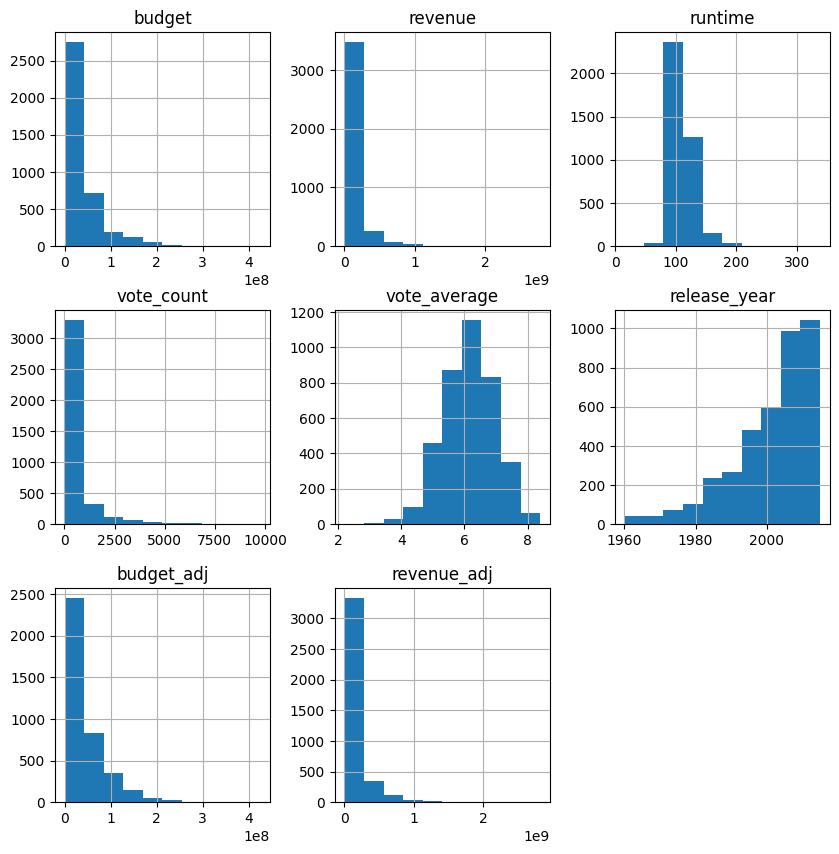

In [83]:
# The histograms after the data clean.
df_movie[['budget', 'revenue', 'runtime', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']].hist(figsize=(10,10));

### Data Clean Conclusion - Several cleaning methods were applied for this process such as dropping columns that are not needed for this analysis, formatting float numbers to have commas for better readability, using the split method & a lambda function to extract only one genre for each row, and removing rows with 0's instead of putting the median value so that data would not be skewed for the statistical analysis. After these operations were completed, the dataset was checked again with the .any(), .info(), .describe(), and .shape methods to see the results of the data clean. The dataset is now 3855 rows and 18 columns. Now to the Exploratory Data Analysis section.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year using revenue adjusted and profit as the determining factors.)

In [84]:
# Calculating profit and creating a new column in the dataset.
df_movie['profit']=df_movie['revenue_adj']-df_movie['budget_adj']
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52","1,254,445,953.24"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49","210,161,353.21"
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,"101,199,955.47","271,619,025.41","170,419,069.94"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80","1,718,723,210.76"
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,"174,799,923.09","1,385,748,801.47","1,210,948,878.38"


In [87]:
def top_genre(df_movie, criteria_col, new_col_name):
    # A copy of the original DataFrame is made
    df_genres = df_movie.copy()

    # Grouping by release_year and genres columns, then aggregating by the sum of either revenue_adj or proft.
    genre_criteria = df_genres.groupby(['release_year', 'genres']).agg(
        total_criteria=(criteria_col, 'sum')
    ).reset_index()

    # Find the top genre by the different criteria ('revenue_adj' & 'profit') for each year
    mostpopular_eachyear = genre_criteria.loc[
        genre_criteria.groupby('release_year')['total_criteria'].idxmax()
    ]

    # release_year ascending sort
    mostpopular_eachyear = mostpopular_eachyear.sort_values(by='release_year')

    # Aggregated column 'total_criteria' is renamed to the provided new_col_name
    mostpopular_eachyear = mostpopular_eachyear.rename(columns={'total_criteria': new_col_name})

    return mostpopular_eachyear

In [88]:
# Find revenue_adj, revenue_adj is in criteria_col, and total_revenue_adj is the new column name:
top_genre_revenue = top_genre(df_movie, 'revenue_adj', 'total_revenue_adj')
print(top_genre_revenue)

     release_year           genres  total_revenue_adj
0            1960           Action     478,542,452.81
4            1961        Adventure   1,574,814,739.70
10           1962        Adventure     934,214,974.69
14           1963           Action     632,975,152.71
19           1964        Adventure     878,080,399.54
25           1965            Drama   1,985,760,220.46
28           1966            Drama     226,643,572.37
34           1967           Family   1,345,551,058.99
40           1968  Science Fiction     355,546,597.21
45           1969          History     608,151,066.34
50           1970            Drama   1,275,477,250.90
52           1971           Action     871,055,105.08
61           1972            Drama   1,518,421,562.84
67           1973            Drama   2,182,058,379.94
69           1974           Action   1,227,036,309.16
79           1975           Horror   1,907,005,841.92
84           1976            Drama   1,549,251,397.32
88           1977        Adv

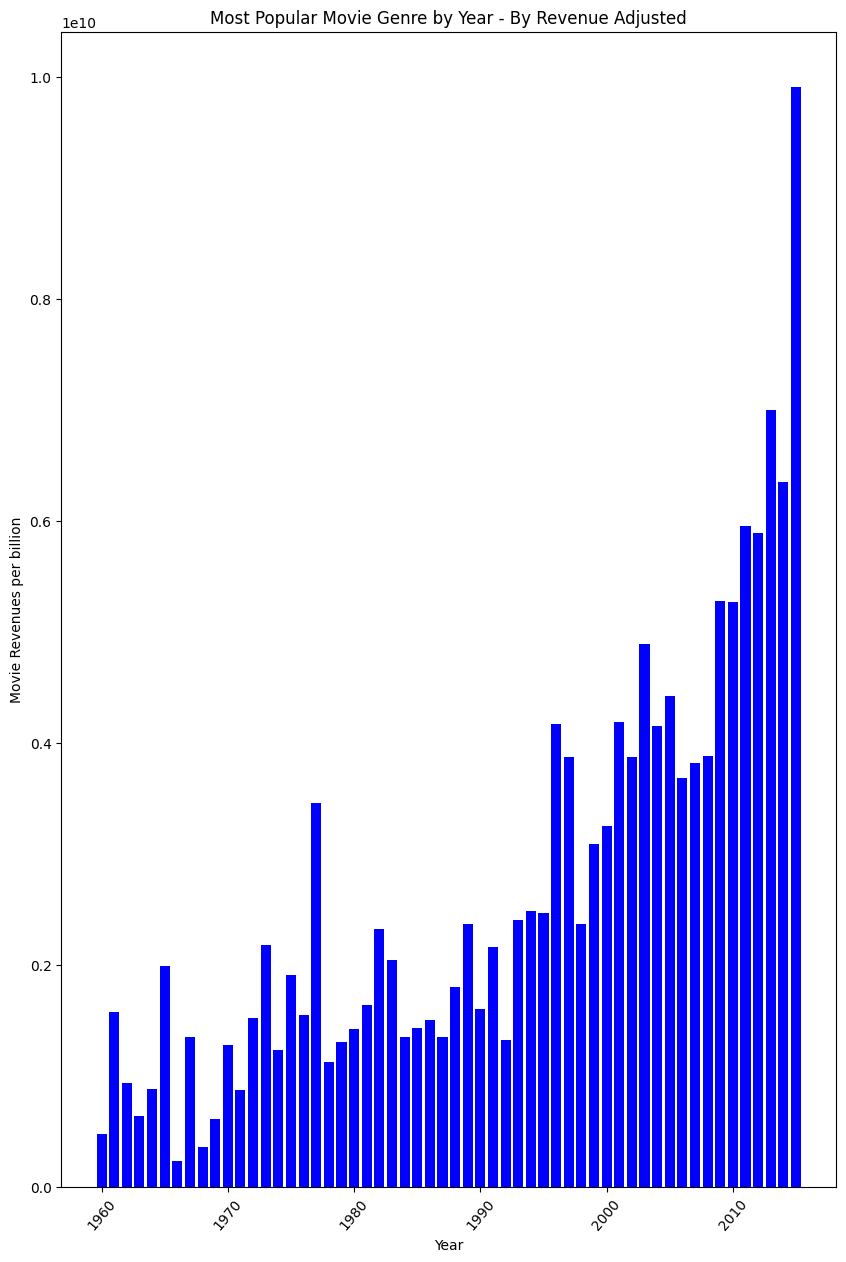

In [89]:
# Showing the results in matplotlib
plt.figure(figsize=(10, 15))
plt.bar(top_genre_revenue['release_year'], top_genre_revenue['total_revenue_adj'], color='blue')
plt.xlabel('Year')
plt.ylabel('Movie Revenues per billion')
plt.title('Most Popular Movie Genre by Year - By Revenue Adjusted')
plt.xticks(rotation=50)
plt.show()

In [90]:
top_genre_revenue.value_counts('genres')

genres
Action             19
Adventure          17
Drama              11
Comedy              3
Horror              2
Science Fiction     2
Family              1
History             1
dtype: int64

In [91]:
# Find profit, profit is in criteria_col, and total_profit is the new_col_name:
top_genre_profit = top_genre(df_movie, 'profit', 'total_profit')
print(top_genre_profit)

     release_year           genres     total_profit
0            1960           Action   375,320,908.41
4            1961        Adventure 1,545,635,294.87
10           1962        Adventure   818,158,947.74
14           1963           Action   494,131,654.96
19           1964        Adventure   853,474,463.61
25           1965            Drama 1,693,712,432.59
28           1966            Drama   176,258,462.18
34           1967           Family 1,319,404,004.03
40           1968  Science Fiction   280,319,033.83
45           1969          History   572,485,481.13
50           1970            Drama 1,156,410,242.01
52           1971           Action   819,357,233.91
61           1972            Drama 1,476,705,075.38
67           1973            Drama 2,140,313,523.52
69           1974           Action 1,094,367,792.51
79           1975           Horror 1,878,643,093.71
84           1976            Drama 1,460,739,172.87
88           1977        Adventure 3,366,935,456.89
99          

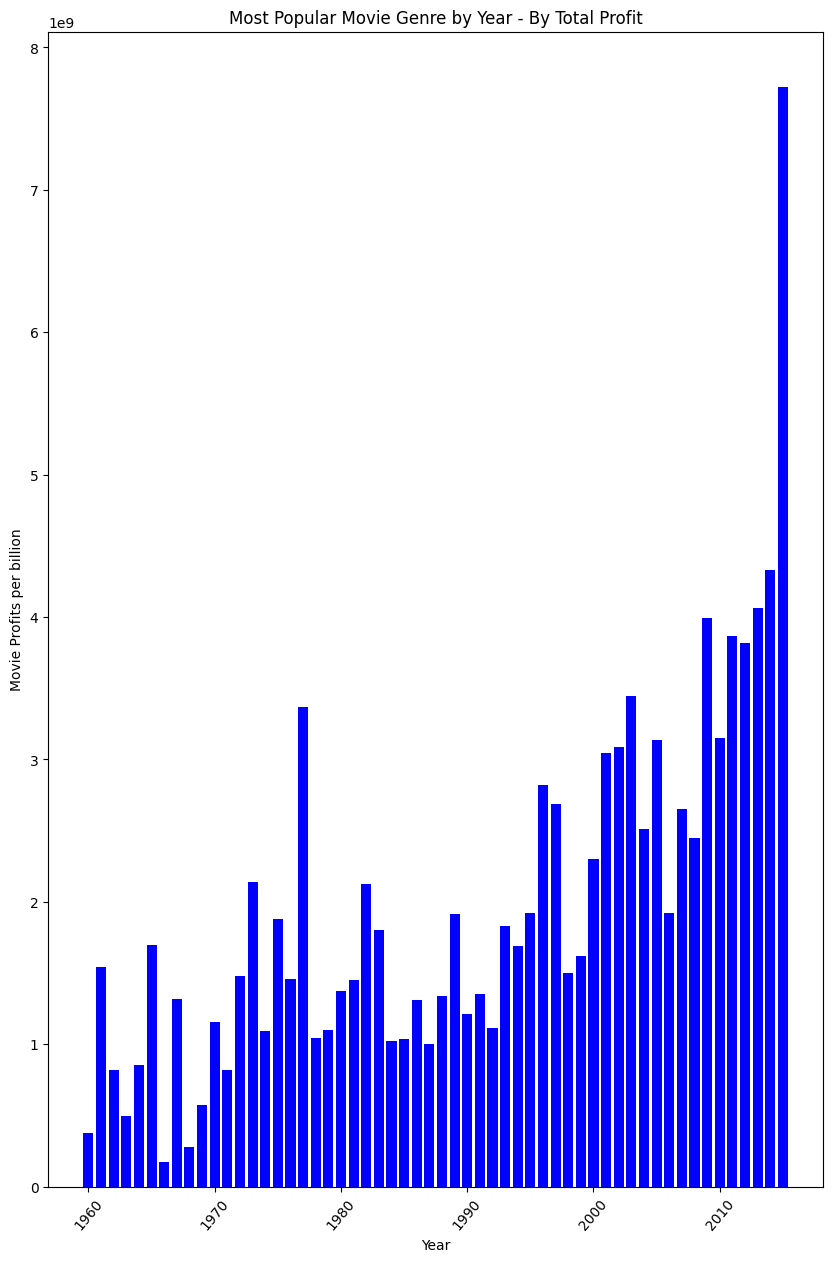

In [92]:
# Showing the results in matplotlib
plt.figure(figsize=(10, 15))
plt.bar(top_genre_profit['release_year'], top_genre_profit['total_profit'], color='blue')
plt.xlabel('Year')
plt.ylabel('Movie Profits per billion')
plt.title('Most Popular Movie Genre by Year - By Total Profit')
plt.xticks(rotation=50)
plt.show()

In [93]:
top_genre_profit.value_counts('genres')

genres
Adventure          17
Action             16
Drama              10
Comedy              5
Horror              2
Science Fiction     2
Crime               1
Family              1
History             1
Thriller            1
dtype: int64

In [94]:
# Compare between (Genre by revenue) and (Genre by profit) for the range of years.
GenreBy_Revenue = top_genre_revenue['genres'].value_counts()
GenreBy_Profit = top_genre_profit['genres'].value_counts()


# Combine the counts into a DataFrame
combined_genres = pd.DataFrame({'GenreByRevenue': GenreBy_Revenue, 'GenreByProfit': GenreBy_Profit})

print(combined_genres)

                 GenreByRevenue  GenreByProfit
Action                    19.00             16
Adventure                 17.00             17
Comedy                     3.00              5
Crime                       NaN              1
Drama                     11.00             10
Family                     1.00              1
History                    1.00              1
Horror                     2.00              2
Science Fiction            2.00              2
Thriller                    NaN              1


Notes: When comparing the data, the Adventure genre stays the same with 17 top spots. The Action genre decreases to 16 when analyzing by Profit instead of revenue_adj. Crime, Drame, and Thriller genres each get an additional year as the top genre analyzing by Profit. Thriller and Crime was not in the Genre by Revenue column, but added in the Genre by Proft column.

### Research Question 2 (What kinds of properties are associated with movies that have high revenues?)

In [42]:
df_highest = df_movie
# sorting for highest revenues 
df_highest=df_highest.sort_values(by=['revenue_adj'], ascending=False)
# creating a dataframe consisting top 50 movies with the most revenue.
top_50=df_highest.head(50)
top_50

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1386,19995,tt0499549,9.43,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.10,2009,"240,886,902.89","2,827,123,750.41","2,586,236,847.52"
1329,11,tt0076759,12.04,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Adventure,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.90,1977,"39,575,591.36","2,789,712,242.28","2,750,136,650.92"
5231,597,tt0120338,4.36,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.30,1997,"271,692,064.21","2,506,405,735.42","2,234,713,671.21"
10594,9552,tt0070047,2.01,8000000,441306145,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,12-year-old Regan MacNeil begins to adapt an e...,122,Drama,Warner Bros.|Hoya Productions,12/26/73,1113,7.20,1973,"39,289,276.63","2,167,324,901.20","2,128,035,624.57"
9806,578,tt0073195,2.56,7000000,470654000,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,An insatiable great white shark terrorizes the...,124,Horror,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.30,1975,"28,362,748.20","1,907,005,841.92","1,878,643,093.71"
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,"183,999,919.04","1,902,723,129.80","1,718,723,210.76"
8889,601,tt0083866,2.90,10500000,792910554,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,A science fiction fairytale about an extra-ter...,115,Science Fiction,Universal Pictures|Amblin Entertainment,4/3/82,1830,7.20,1982,"23,726,245.23","1,791,694,309.25","1,767,968,064.02"
8094,1642,tt0113957,1.14,22000000,1106279658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Angela Bennett is a freelance software enginee...,114,Crime,Columbia Pictures,7/28/95,201,5.60,1995,"31,481,271.08","1,583,049,536.35","1,551,568,265.28"
10110,12230,tt0055254,2.63,4000000,215880014,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,When a litter of dalmatian puppies are abducte...,79,Adventure,Walt Disney Productions,1/25/61,913,6.60,1961,"29,179,444.83","1,574,814,739.70","1,545,635,294.87"
4361,24428,tt0848228,7.64,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,When an unexpected enemy emerges and threatens...,143,Science Fiction,Marvel Studios,4/25/12,8903,7.30,2012,"208,943,741.90","1,443,191,435.21","1,234,247,693.31"


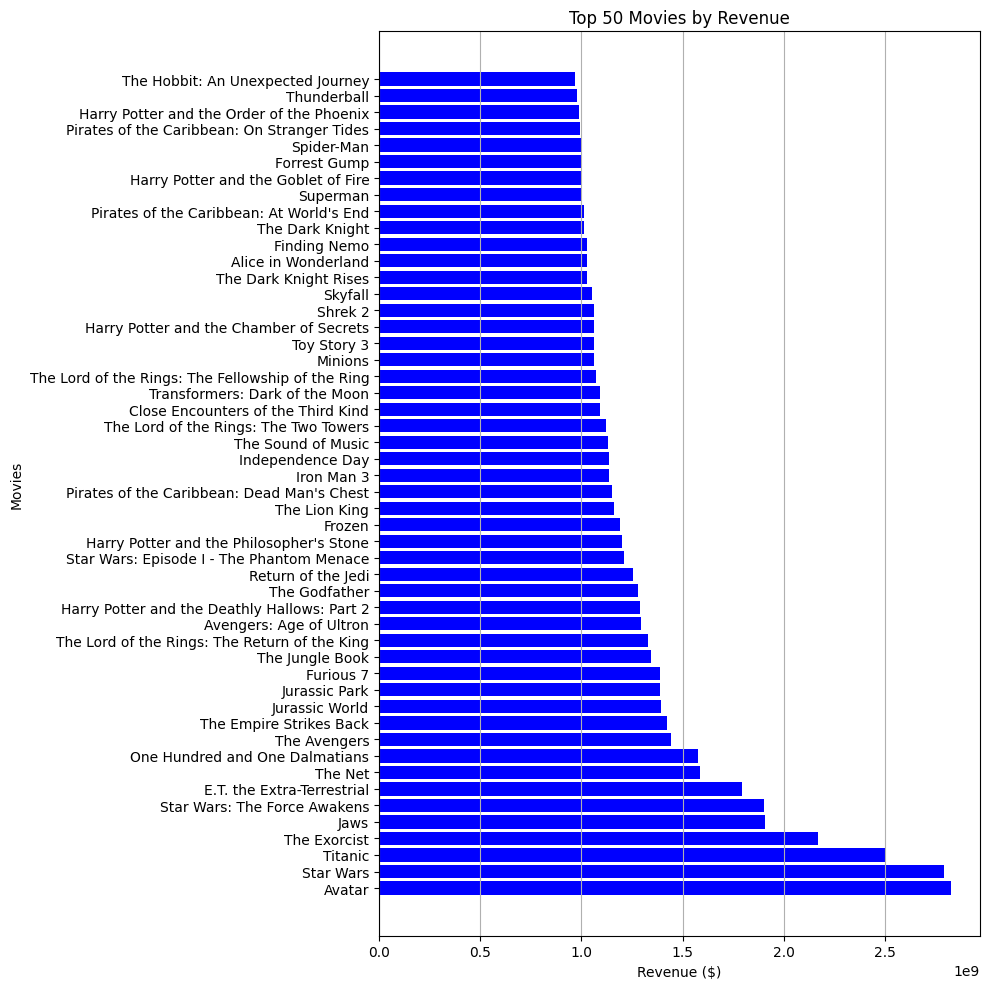

In [43]:
plt.figure(figsize=(10,10))

# Plotting the revenue for the top 50 movies
plt.barh(top_50['original_title'], top_50['revenue_adj'], color='b')

# Add labels and title
plt.xlabel('Revenue ($)')
plt.ylabel('Movies')
plt.title('Top 50 Movies by Revenue')

# Add grid lines
plt.grid(axis='x')

plt.tight_layout()
plt.show();

In [44]:
df_ratedbest = df_movie[(df_movie['vote_count'] > 2000) & (df_movie['vote_average'] > 7.5)]
# sorting for highest vote_average with vote counts higher than 1000 
df_ratedbest=df_ratedbest.sort_values(by=['profit', 'vote_average'], ascending=False)
# creating a dataframe consisting top 50 most profitable movies
rated_50=df_ratedbest.head(50)
rated_50

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1329,11,tt0076759,12.04,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Adventure,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.90,1977,"39,575,591.36","2,789,712,242.28","2,750,136,650.92"
7309,1891,tt0080684,5.49,18000000,538400000,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Irvin Kershner,"The epic saga continues as Luke Skywalker, in ...",124,Adventure,Lucasfilm|Twentieth Century Fox Film Corporation,1/1/80,3954,8.00,1980,"47,628,661.55","1,424,626,187.77","1,376,997,526.22"
7269,238,tt0068646,5.74,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,"Spanning the years 1945 to 1955, a chronicle o...",175,Drama,Paramount Pictures|Alfran Productions,3/15/72,3970,8.30,1972,"31,287,365.59","1,277,913,732.39","1,246,626,366.80"
4949,122,tt0167260,7.12,94000000,1118888979,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,Aragorn is revealed as the heir to the ancient...,201,Adventure,WingNut Films|New Line Cinema,12/1/03,5636,7.90,2003,"111,423,148.61","1,326,278,010.48","1,214,854,861.87"
7987,1892,tt0086190,4.83,32350000,572700000,Return of the Jedi,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Richard Marquand,As Rebel leaders map their strategy for an all...,135,Adventure,Lucasfilm|Twentieth Century Fox Film Corporation,5/23/83,3101,7.80,1983,"70,824,243.13","1,253,818,981.12","1,182,994,737.99"
3374,12445,tt1201607,5.71,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,"Harry, Ron and Hermione continue their quest t...",130,Adventure,Warner Bros.|Heyday Films|Moving Picture Compa...,7/7/11,3750,7.70,2011,"121,174,755.32","1,287,183,997.56","1,166,009,242.24"
4180,8587,tt0110357,4.78,45000000,788241776,The Lion King,Jonathan Taylor Thomas|Matthew Broderick|James...,Roger Allers|Rob Minkoff,A young lion cub named Simba can't wait to be ...,89,Family,Walt Disney Pictures|Walt Disney Feature Anima...,6/23/94,3489,7.70,1994,"66,200,020.27","1,159,591,590.01","1,093,391,569.74"
3911,121,tt0167261,8.10,79000000,926287400,The Lord of the Rings: The Two Towers,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,Frodo and Sam are trekking to Mordor to destro...,179,Adventure,WingNut Films|New Line Cinema|The Saul Zaentz ...,12/18/02,5114,7.80,2002,"95,768,650.10","1,122,902,454.42","1,027,133,804.32"
2633,120,tt0120737,8.58,93000000,871368364,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,"Young hobbit Frodo Baggins, after inheriting a...",178,Adventure,WingNut Films|New Line Cinema|The Saul Zaentz ...,12/18/01,6079,7.80,2001,"114,528,394.85","1,073,079,785.53","958,551,390.68"
4179,13,tt0109830,6.72,55000000,677945399,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,A man with a low IQ has accomplished great thi...,142,Comedy,Paramount Pictures,7/6/94,4856,8.10,1994,"80,911,135.89","997,333,314.60","916,422,178.71"


### Research Question 3 (What movies were the biggest flops and what properties are similar with flops.)

In [45]:
# Searching for biggest flops
df_flops = df_movie
# sorting for biggest flops 
df_flops=df_flops.sort_values(by=['profit'], ascending=True)
# creating a dataframe consisting of the top 20 movie flops.
bottom_20=df_flops.head(20)
bottom_20

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
2244,46528,tt1032751,0.25,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure,Boram Entertainment Inc.,12/2/10,74,6.40,2010,"425,000,000.00","11,087,569.00","-413,912,431.00"
5508,57201,tt1210819,1.21,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,The Texas Rangers chase down a gang of outlaws...,149,Action,Walt Disney Pictures|Jerry Bruckheimer Films|I...,7/3/13,1607,6.00,2013,"238,688,504.95","83,578,333.82","-155,110,171.13"
7031,10733,tt0318974,0.95,145000000,25819961,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,Based on the 1836 standoff between a group of ...,137,Western,Imagine Entertainment|Touchstone Pictures,4/7/04,60,5.90,2004,"167,394,582.97","29,807,735.20","-137,586,847.77"
2435,1911,tt0120657,1.19,160000000,61698899,The 13th Warrior,Antonio Banderas|Vladimir Kulich|Dennis StorhÃ...,John McTiernan,"In AD 922, Arab courtier, Ahmad Ibn Fadlan acc...",102,Adventure,Touchstone Pictures,8/27/99,275,6.20,1999,"209,448,455.46","80,767,119.37","-128,681,336.09"
4970,10009,tt0328880,1.65,100000000,250,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,When a young Inuit hunter needlessly kills a b...,85,Animation,Walt Disney Pictures|Walt Disney Feature Anima...,10/20/03,753,6.80,2003,"118,535,264.48",296.34,"-118,534,968.14"
8102,1408,tt0112760,0.98,98000000,18517322,Cutthroat Island,Geena Davis|Matthew Modine|Frank Langella|Maur...,Renny Harlin,"Morgan Adams and her slave, William Shaw, are ...",119,Action,Le Studio Canal+|Laurence Mark Productions|Met...,12/22/95,54,6.10,1995,"140,234,752.98","26,497,674.25","-113,737,078.73"
4078,11692,tt0180052,0.91,100000000,7103973,The Adventures of Pluto Nash,Eddie Murphy|Randy Quaid|Rosario Dawson|Joe Pa...,Ron Underwood,"The year is 2087, the setting is the moon. Edd...",95,Action,Village Roadshow Pictures|Castle Rock Entertai...,8/15/02,75,4.60,2002,"121,226,139.36","8,611,872.21","-112,614,267.15"
3484,50321,tt1305591,0.92,150000000,38992758,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,"When Martians suddenly abduct his mom, mischie...",88,Adventure,Walt Disney Animation Studios,3/9/11,129,5.50,2011,"145,409,706.39","37,799,503.28","-107,610,203.11"
7332,10935,tt0080855,0.42,44000000,3484331,Heaven's Gate,Kris Kristofferson|Christopher Walken|John Hur...,Michael Cimino,Harvard graduate James Averill (Kris Kristoffe...,219,Action,United Artists,11/19/80,18,6.00,1980,"116,425,617.13","9,219,667.89","-107,205,949.24"
8765,10384,tt0134983,0.39,90000000,14828081,Supernova,James Spader|Angela Bassett|Robert Forster|Lou...,Walter Hill|Jack Sholder,"Set in the 22nd century, when a battered salva...",91,Science Fiction,United Artists|Metro-Goldwyn-Mayer (MGM)|Hamme...,1/14/00,42,4.70,2000,"113,966,290.29","18,776,682.04","-95,189,608.25"


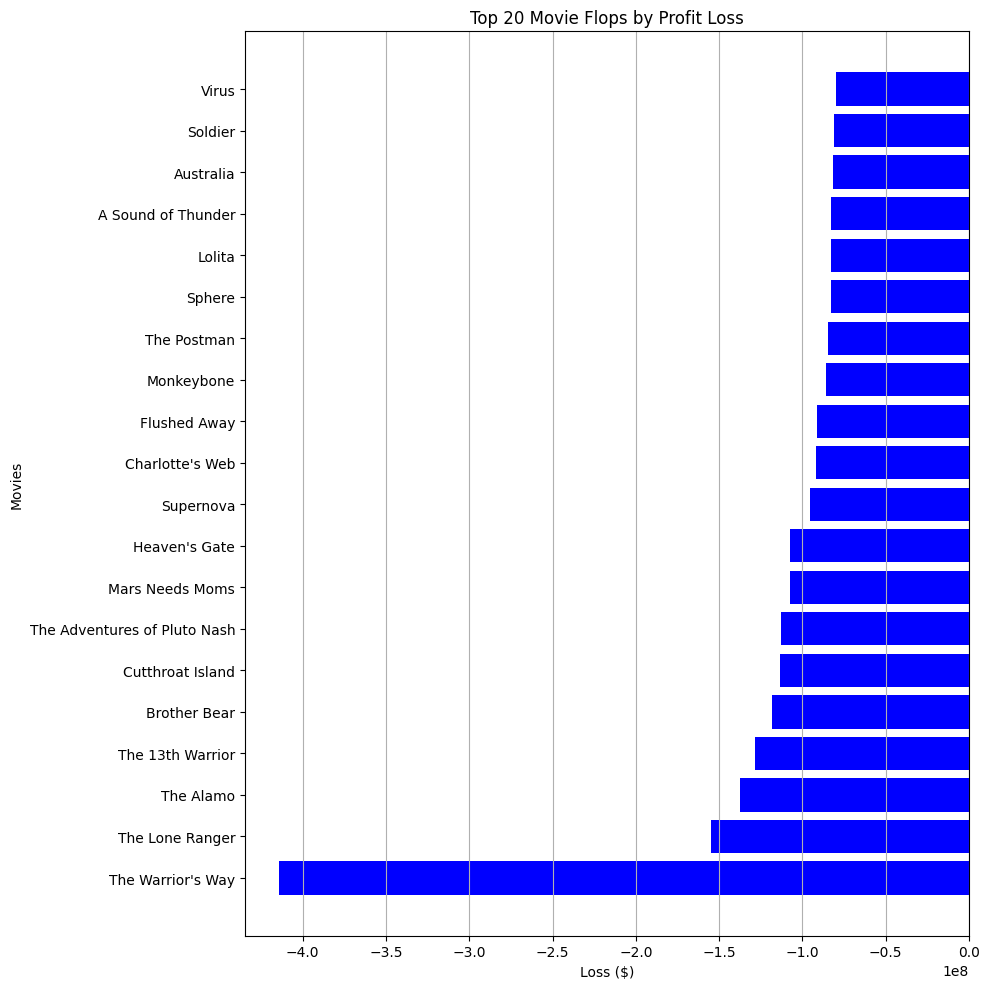

In [46]:
plt.figure(figsize=(10,10))

# Plotting the profit for the bottom 20 movies (flops)
plt.barh(bottom_20['original_title'], bottom_20['profit'], color='b')

# Add labels and title
plt.xlabel('Loss ($)')
plt.ylabel('Movies')
plt.title('Top 20 Movie Flops by Profit Loss')

# Add grid lines
plt.grid(axis='x')

# Plotting it out
plt.tight_layout()
plt.show();

In [47]:
ww = df_movie.query('original_title == "The Warrior\'s Way"')
print(ww)

         id    imdb_id  popularity     budget   revenue     original_title  \
2244  46528  tt1032751        0.25  425000000  11087569  The Warrior's Way   

                                                   cast    director  \
2244  Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...  Sngmoo Lee   

                                               overview  runtime     genres  \
2244  An Asian assassin (Dong-gun Jang) is forced to...      100  Adventure   

          production_companies release_date  vote_count  vote_average  \
2244  Boram Entertainment Inc.      12/2/10          74          6.40   

      release_year     budget_adj   revenue_adj          profit  
2244          2010 425,000,000.00 11,087,569.00 -413,912,431.00  


### Research Question 4 (What directors have the movies with the most profit and most revenue.)

In [48]:
# Determining director movie count, total revenue, and total profit for the top 100 movies.
# Top 100 movies by highest revenue
# Count the number of movies
# List the name of the director's movies
# Sum of revenue for each director
# Sum of profit for each director
top_100=df_highest.head(100)
director_info = top_100.groupby('director').agg(
    Movie_Count=('profit', 'size'),  
    Movie_Titles=('original_title', lambda x: ', '.join(x)), 
    Total_Revenue=('revenue_adj', 'sum'), 
    Total_Profit=('profit', 'sum') 
    ).reset_index()
director_info = director_info.sort_values(by=['Total_Revenue', 'Total_Profit', 'Movie_Count'], ascending=False)
director_info.head(50)

,director,Movie_Count,Movie_Titles,Total_Revenue,Total_Profit
59,Steven Spielberg,7,"Jaws, E.T. the Extra-Terrestrial, Jurassic Par...","8,746,400,855.23","8,212,295,394.75"
44,Peter Jackson,6,"The Lord of the Rings: The Return of the King,...","6,265,000,227.65","5,241,562,862.88"
29,James Cameron,3,"Avatar, Titanic, Terminator 2: Judgment Day","6,166,097,763.64","5,493,409,512.34"
22,George Lucas,4,"Star Wars, Star Wars: Episode I - The Phantom ...","5,736,012,091.06","5,274,252,403.37"
18,David Yates,4,"Harry Potter and the Deathly Hallows: Part 2, ...","4,177,455,259.23","3,394,430,107.98"
40,Michael Bay,4,"Transformers: Dark of the Moon, Transformers: ...","3,426,565,652.52","2,740,045,316.03"
11,Chris Columbus,3,"Harry Potter and the Philosopher's Stone, Harr...","3,060,831,995.33","2,755,629,667.65"
24,Gore Verbinski,3,"Pirates of the Caribbean: Dead Man's Chest, Pi...","2,939,764,146.51","2,241,980,369.79"
14,Christopher Nolan,3,"The Dark Knight Rises, The Dark Knight, Inception","2,866,945,812.72","2,282,144,215.12"
56,Sam Raimi,3,"Spider-Man, Spider-Man 3, Spider-Man 2","2,837,842,700.30","2,167,118,792.31"


In [49]:
# Determining director movie count, total revenue, and total profit for the whole dataset.
# Using all of the movies instead of the top 100 movies by total revenue.
# Count the number of movies
# List the name of the director's movies
# Sum of revenue for each director
# Sum of profit for each director
director_info = df_movie.groupby('director').agg(
    Movie_Count=('profit', 'size'),
    Movie_Titles=('original_title', lambda x: ', '.join(x)), 
    Total_Revenue=('revenue_adj', 'sum'), 
    Total_Profit=('profit', 'sum') 
    ).reset_index()
director_info = director_info.sort_values(by=['Total_Revenue', 'Total_Profit', 'Movie_Count'], ascending=False)
director_info.head(50)

,director,Movie_Count,Movie_Titles,Total_Revenue,Total_Profit
1548,Steven Spielberg,27,"Bridge of Spies, Close Encounters of the Third...","15,202,446,786.62","13,126,025,234.23"
643,James Cameron,8,"Avatar, True Lies, Ghosts of the Abyss, Titani...","7,327,220,858.39","6,296,578,359.74"
1242,Peter Jackson,11,"The Hobbit: The Battle of the Five Armies, The...","7,019,847,816.48","5,645,491,689.79"
541,George Lucas,6,"Star Wars, Star Wars: Episode I - The Phantom ...","6,313,919,162.63","5,844,159,207.50"
1377,Robert Zemeckis,15,"The Walk, A Christmas Carol, Forrest Gump, Fli...","5,655,648,249.32","4,335,995,165.48"
1068,Michael Bay,11,"Transformers: Age of Extinction, Transformers:...","5,460,671,958.24","3,958,675,886.72"
229,Chris Columbus,9,"Pixels, Percy Jackson & the Olympians: The Lig...","4,893,485,768.13","4,171,046,474.21"
1596,Tim Burton,16,"Big Eyes, Alice in Wonderland, Sleepy Hollow, ...","4,529,285,478.84","3,200,595,269.58"
381,David Yates,4,"Harry Potter and the Half-Blood Prince, Harry ...","4,177,455,259.23","3,394,430,107.98"
260,Christopher Nolan,8,"Interstellar, Inception, The Dark Knight, Inso...","4,164,261,914.93","3,149,568,381.05"


<a id='conclusions'></a>
## Conclusions

#### Research Question 1 (Which genres are most popular from year to year? (Based on adjusted revenue and profit)
   **Results for most popular genre analyzed by adjusted revenue**
   Basing the most popular genre on the adjusted revenue of the genre, Action (19) and Adventure (17) genres were the predominant genres from 1965 to 2015. From 2009 to 2015 the Action genre was continually the top genre. In 2015, there was a big spike at 9.9 billion in total for adjusted revenue compared to the previous years. The matplotlib chart shows from 1965 to 2015, the top genres based on adjusted revenue as well. Since 2000, the top genres were either action or adventure movies. We can't discount Drama in 3rd place with (11) movies through this 1965-2015 year range, though the last year it led in Genre's was 1997 when the movie Titanic came out. This analysis shows since 2000, moviegoers are more likely to spend their money on an action or adventure film.
   
   **Results for most popular genre analyzed by profit**
Basing the most popular genre on the profit of the genre, Action (16) and Adventure (17) genres were the predominant genres from 1965 to 2015. From 2009 to 2015 the Action genre was continually the top genre like in the data when analyzed by adjusted revenue. Just like in the adjusted revenue analysis, in 2015 there was a big spike at approx. 7 billion for total profit compared to previous years. The matplotlib chart shows from 1965 to 2015, the top genres based on profit as well. Since 2001, the top genres were either action or adventure movies. For profit, Drama was in 3rd place with (10) movies through this 1965-2015 year range. For the profit analysis, Drama's last top spot for Genre's was in 1997 when the movie Titanic came out as well. 
    
   **Comparison of the both Genre's by adjusted revenue and profit**
   There was no drastic difference between adjusted revenue and profit for Genres. When comparing the data, the Adventure genre stayed the same with being the top genre 17 times. The Action genre decreased to 16 when analyzed by Profit instead of revenue_adj which was at 19. Crime, Drama, and Thriller genres each gained an additional year as the top genre when analyzed by Profit. Thriller and Crime was not in the Genre when calculating by Revenue, but both were added in the Genre by Profit column. Genres: Action and Adventure were still the top genres using both calculations.

#### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)
   Based on the data provided in the dataset the following properties are associated with movies that have high revenues. 
1. High revenue movies also have high vote_averages and high vote_counts. A vote_average of greater than 7 typically correlates to high revenue movies examining the top_40 filtered dataset. 

2. Genre is another property. High revenue movies are typically Action & Adventure Genre films with epic storylines that encompass multiple films like Star Wars. People love to delve into a fantasy world like Star Wars and Lord of the Rings with multiple movies to be engrossed in. 

3. Famous directors also are associated with high revenue movies. For instance, director James Cameron has two films in the top 40 highest revenue movies. Moviegoers love his over two hour movies filled with drama, tragedy, action, and adventure.

#### Research Question 3 (What movies were the biggest flops and what properties are similar with flops.)
   The biggest top 5 movie flops by profit loss are The Warrior's Way, The Lone Ranger, The Alamo, The 13th Warrior, and Brother Bear. The properties for a movie flop appears to be the vote_average that is 6 and below on TMDB, a large revenue & profit loss which is obvious, and a low popularity number based on the number of title searched for those films on the TMDB website. Also, to note the two of the top five movie flops are remakes of western action films (The Alamo and the Lone Ranger). The movie The Warrior's Way had a substantial profit loss of -413,912,431.00 which doesn't look accurate. The Warrior's Way movie was selected at the beginning of the Data Wrangling process and selected in the Exploratory Data Analysis and both times the same profit loss comes up. Searching on TMDB for The Warrior's Way movie online shows a budget of 42 million, while the budget in this csv file for the movie shows 425 million. This has skewed the data for The Warrior's Way incorrectly making it the biggest movie flop on the list. The budget for the film, The Warrior's Way, is incorrect in this csv file and needs to be corrected. So the Lone Ranger movie would actually be the biggest flop in this csv dataset.

#### Research Question 4 (What directors have the movies with the most revenue and most profit.)
From the aggregation analysis below:

***Results for the 100 movies by total revenue:***
1. Steven Spielberg has the most movies in the top 40 list with 7 and the most adjusted revenue and profit.

2. Even though director James Cameron only has 3 movies (Titanic, Avatar, and Terminator 2: Judgement Day) in the top 40, he is 3rd for most adjusted revenue and profit. While Spielberg and Jackson had to make 6 and 7 movies respectively to get to the top of the list, James Cameron only had to make 3 movies to get to 3rd on this list which is an impressive feat. James Cameron is in 2nd place when you filter by most profit which is even more impressive than being in 3rd for most revenue.  

***Results for all of the movies***
1.  Steven Spielberg comes in first place with 27 movies in the database for both total revenue and total profit by a significant margin. No director comes close to matching his output, total revenues, and total profit.

2. Director James Cameron comes in a distant 2nd place in both total revenue and total profit. However, he only directed 8 movies in the dataset compared to 27 movies. If he would have matched the output of Steven Spielberg, James Cameron would probably be in 1st place for total revenue and total profit, but that is just speculation. However, being in 2nd place with only 8 films is a very impressive feat.

#### Caveats
Data Integrity: The Warrior's Way movie has an incorrect budget which skewed it to be the biggest movie flop on the list. The csv file needs to be checked to determine if there are any other errors in this csv file, but this is beyond the scope of this project.

Genre is also sort of hard to define. Some movies could be classified as Action-Adventure and some sites might combine Action-Adventure into 1 genre along with having separate genres for Action and Adventure. However for the purpose of this exercise, TMDB has Action and Adventure as separate genres which will be fine for this analysis.

## Submitting your Project 

The notebook has been converted into an HTML file.

In [42]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 978669 bytes to Investigate_a_Dataset.html
